In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Drunken Ant

In [26]:
class DrunkenAnt():

    # Constructor for the class
    def __init__(self, velocity):
        # Step size
        self.velocity = velocity
        # List to store the positions of the ant. Alternatively this could be a single 2-dim vector if we dont want to know the history
        self.trajectory = [np.zeros((2,))]

    # Calling the class directly returns the current position e.g. ant()
    def __call__(self,):
        # To traverse the list in reverse order we can use negative indices
        return self.trajectory[-1]

    # Perform n steps n=1 is used to prespecify a default value in case the user only wants to use ant.step() = ant.step(n=1)
    def steps(self, n=1):
        for _ in range(n):
            # Draw point between 0 to 1
            t = np.random.rand() 
            # Map point to unit circle
            unit_vector = np.array([np.cos(2*np.pi*t), np.sin(2*np.pi*t)])
            # We multiply for random to add a little variability to the velocity (Min value is 0.2 and max value is 1)
            vel_noise = np.random.rand() * 0.8 + 0.2
            # Next post is just current position plus a random normal 2-dim vector times velocity
            next_pos = self.trajectory[-1] + (self.velocity * np.random.rand()) * unit_vector 
            # Store the position
            self.trajectory.append(next_pos)

    # Plot the history
    def show_trajectory(self,):
        # 0 and 1 are the indices for the x and y coordinates, respectively
        x = np.array(self.trajectory)[:,0]
        y = np.array(self.trajectory)[:,1]
        # Draw a point at each step
        plt.scatter(x,y)
        # Connect the points with lines
        plt.plot(x,y)
        # Add some formatting to the graph
        plt.xlabel('X position')
        plt.ylabel('Y position')
        plt.xlabel('Drunken Ant Trajectory')
        # Add some labels to the points
        for i,(a,b) in enumerate(zip(x,y)):
            plt.text(a,b,f'{i}')

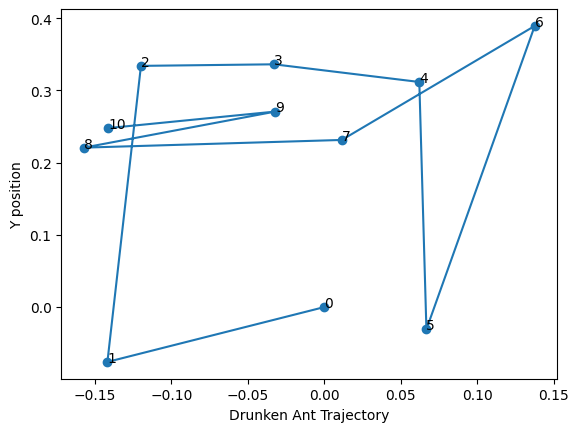

In [27]:
# Create an 'ant'
ant = DrunkenAnt(0.5)
# Take 10 steps 
ant.steps(n=10)
# Visualize the trajectory
ant.show_trajectory()

# Path Search

Since we have to find all paths starting from each node the easiest way is to use recursive computing. 

Recursive computing consist on calling a function from within the same function. 
For a quick tutorial you can see: <a>https://www.w3schools.com/python/gloss_python_function_recursion.asp</a>

The following code implements a simple recursive search, what we do is to start a new search for the goal node at each new node we visit. 

However we prevent new searches to start if we already visit the node at some point in the past; to achieve this goal every time we call the function we will pass a set with all the nodes we already visited at some point.

Moreover, we also want to recover the path itself, thus we also need to node the current path that we traversed up to that point; to achieve this goal we will pass a list with the current path up to this point to the function.

Effectively we will decompose the graph into a tree of paths (<a>https://en.wikipedia.org/wiki/Tree_(graph_theory)</a>) with the start index at the root and we will check every leaf node to see if it is the final index that we are looking for.

Recursive computing may be a little confusing the first time you see it, but it is a powerful tool if learn to master it, since a lot of problems are considerably easier to understand with recursion.

In [102]:
def recursive_search(start_idx, final_idx, idx, visited_nodes, current_path, graph):
    # Check if we are done searching
    if idx == final_idx:
        # WE REACH THE FINAL NODE!
        # Return the path
        return [current_path + [idx]]
    else:
        # Get all neightbors of node
        neighbors = set(np.argwhere(graph[idx, :] == 1).reshape(-1))
        # Filter out the nodes already visited
        non_visited_neighbors = neighbors.difference(visited_nodes)
        # Check if the search can continue
        if len(non_visited_neighbors) == 0:
            # There are no more nodes to visit and we did not reach the final index
            # Return a void path
            return [None]
        else:
            # Create a list to store all the paths we have found
            paths = []
            # Visit each of the non visited neighbors recursively
            for neighbor in non_visited_neighbors:
                # Add the current index to the current path we are searching
                next_current_path = current_path + [idx]
                # Start a new search
                result = recursive_search(start_idx, final_idx, neighbor, visited_nodes.union(set([neighbor])), next_current_path, graph)
                # Since the algorithm is recursive this means we can obtain several paths 
                for r in result:
                    # Filter out all paths that failed to reach the node
                    if r != None:
                        paths.append( r )
            return paths

In [108]:
# Create a graph
graph = np.array([
    [1, 1, 1, 1, 0],
    [0, 0, 1, 1, 0],
    [0, 1, 1, 1, 1],
    [1, 0, 0, 0, 0],
    [1, 0, 0, 0, 0]
])
# Select start and final nodes
starting_node_idx = 0
final_node_idx = 3
# Run the search
recursive_search(starting_node_idx, final_node_idx, starting_node_idx, set([starting_node_idx]), [], graph)

[[0, 1, 2, 3], [0, 1, 3], [0, 2, 1, 3], [0, 2, 3], [0, 3]]